In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

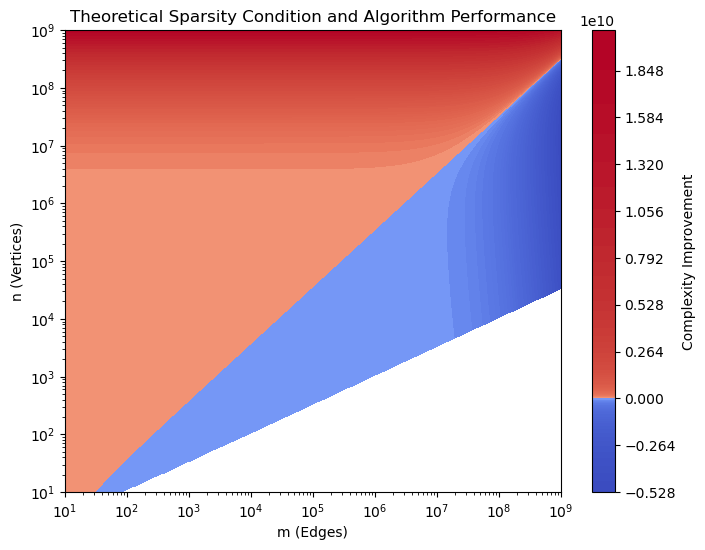

In [128]:
def func1(m, n):
    return m + n * np.log(n)

def func2(m, n):
    return m * np.log(n)**(2/3)

m = np.logspace(1, 9, 500)
n = np.logspace(1, 9, 500)
M, N = np.meshgrid(m, n)
# Calculate the difference between the two functions.
# A positive value means func1 is larger (slower), negative means func2 is larger.
Z = func1(M, N) - func2(M, N)

# Use a symmetric logarithmic scale for the color map to handle the wide range of differences
# and to keep the boundary at zero visually centered.
norm = plt.cm.colors.SymLogNorm(linthresh=1e5, vmin=Z.min(), vmax=Z.max())

plt.figure(figsize=(8, 6))

# Plot the difference using a diverging colormap
contour = plt.contourf(M, N, Z, levels=500, cmap='coolwarm', norm=norm)
plt.colorbar(contour, label='Complexity Improvement')

# Define and overlay the fully connected boundary region
mask_fully_connected = M > N * (N - 1)
plt.contourf(M, N, mask_fully_connected, levels=[0.5, 1.5], colors=['white'], alpha=0.99999)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('m (Edges)')
plt.ylabel('n (Vertices)')
plt.title('Theoretical Sparsity Condition and Algorithm Performance')

plt.savefig("colormap_contour.png")
plt.show()
